Linear regression using numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

Data

In [ ]:
X, y = datasets.make_regression(n_samples= 1000, n_features=2, noise=20, random_state= 4)
X.shape,y.shape  # X.shape is a tuple

# lin reg problem : predict y for x

((1000, 2), (1000,))

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=.2,random_state=1234) 

In [ ]:
class LinearRegression:
    def __init__(self, lr, n_iter):
        self.lr = lr
        self.n_iter = n_iter
        self.theta = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.theta = np.zeros(n_features)
        self.bias = 0

        #GD
        for _ in range(self.n_iter):
            y_predicted = np.dot(X,self.theta) + self.bias
            dJ = np.dot(X.T,(y_predicted - y))
            db = np.sum(y_predicted - y)

            self.theta -= self.lr * dJ
            self.bias -= self.lr * db
        
        
    def predict(self,X):
        prediction = np.dot(X,self.theta) + self.bias
        return prediction

In [ ]:
lrC = LinearRegression(lr=0.001,n_iter=1000)
lrC.fit(X_train,y_train)
predictions = lrC.predict(X_test)

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s)

R2= 1- SSres / SStot

Where,
SSres is the sum of squares of the residual errors.
SStot is the total sum of the errors.  ?????

Assume R2 = 0.68
It can be referred that 68% of the changeability of the dependent output attribute can be explained by the model while the remaining 32 % of the variability is still unaccounted for.
R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results. 


In [ ]:
def mean_squared_error(predicted, actual):
    
    error_sq = (actual - predicted)**2
    mse = np.mean(error_sq)

    return mse

def r2_score(predicted, actual): # measures how correlated they are
    corr_matrix = np.corrcoef(actual,predicted)
    print(corr_matrix.shape)
    print(corr_matrix)
    corr = corr_matrix[0,1]
    return corr ** 2


In [ ]:
mse = mean_squared_error(predictions,y_test)
r2 = r2_score(predictions,y_test)

(2, 2)
[[1.         0.94769823]
 [0.94769823 1.        ]]


In [ ]:
mse,r2

(388.88161947807225, 0.8981319286662415)

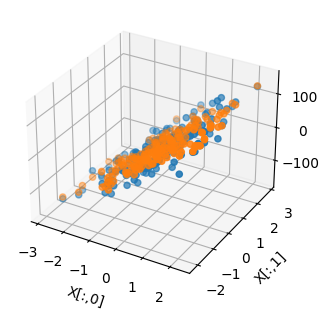

In [ ]:
y_pred_line = lrC.predict(X_test)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))


ax = fig.add_subplot(121, projection = '3d')
ax.scatter3D(X_test[:,0],X_test[:,1],y_test)
ax.scatter3D(X_test[:,0],X_test[:,1],y_pred_line)
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

plt.show()

In [ ]:
y_pred_line.shape, X_train.shape

((800,), (800, 2))